In [7]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
#Data Visulisation
#Line plots
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
url="https://en.wikipedia.org/wiki/List_of_largest_Australian_companies"   #Define the URL
response=requests.get(url)                                                 #Sending an HTTP request
if response.status_code==200:                                              #Checking the respose status
    print("successfully retrieved the webpage!")                               
else:
    print(f"failed to retrieve the page, status code:{response.status_code}")

successfully retrieved the webpage!


In [11]:
soup=BeautifulSoup(response.content,'html.parser')
soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest Australian companies - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-widt

In [13]:
tables = soup.find_all('table')                         #Find all tables
if len(tables) > 1:                                     #Check number of tables
    table = tables[1]                                   #Select second table
    rows = table.find_all('tr')                         #Extract rows
    
    print(table)
    for row in rows:
        print(row)
else:
    print("Less than two tables found on the page.")

<table class="wikitable sortable" style="text-align:right;">
<tbody><tr>
<th align="center">Rank
</th>
<th align="center">Forbes <br/>2000 rank
</th>
<th align="center">Name
</th>
<th align="center">Headquarters
</th>
<th align="center">Revenue<br/>(billions <br/>US$)
</th>
<th align="center">Profit<br/>(billions <br/>US$)
</th>
<th align="center">Assets<br/>(billions <br/>US$)
</th>
<th align="center">Value<br/>(billions <br/>US$)
</th>
<th align="center">Industry
</th></tr>
<tr>
<td>1
</td>
<td>69
</td>
<td align="left"><a href="/wiki/Commonwealth_Bank" title="Commonwealth Bank">Commonwealth Bank</a>
</td>
<td align="left"><a href="/wiki/Sydney" title="Sydney">Sydney</a>
</td>
<td>39.0
</td>
<td>6.5
</td>
<td>870.7
</td>
<td>135.4
</td>
<td align="left">Banking
</td></tr>
<tr>
<td>2
</td>
<td>116
</td>
<td align="left"><a href="/wiki/BHP" title="BHP">BHP</a>
</td>
<td align="left"><a href="/wiki/Melbourne" title="Melbourne">Melbourne</a>
</td>
<td>55.3
</td>
<td>7.3
</td>
<td>100.0
<

In [15]:
companies_list1 = []                              #Initialize the list                           
for row in rows[1:]:                              #Loop through rows
    cells = row.find_all(['td', 'th'])            #Extract cells
    if cells:
        Rank = cells[0].text.strip()              #Clean ans assign data
        Forbes2000Rank = cells[1].text.strip()
        Name = cells[2].text.strip()
        Headquarters=cells[3].text.strip()
        Revenue = cells[4].text.strip()
        Profits = cells[5].text.strip() 
        Assets = cells[6].text.strip() 
        Value = cells[7].text.strip()
        Industry = cells[8].text.strip()  
        companies_list1.append([Rank, Forbes2000Rank, Name, Headquarters,Revenue, Profits, Assets, Value, Industry])      #Append to the list
        
print(companies_list1)


[['1', '69', 'Commonwealth Bank', 'Sydney', '39.0', '6.5', '870.7', '135.4', 'Banking'], ['2', '116', 'BHP', 'Melbourne', '55.3', '7.3', '100.0', '152.1', 'Mining'], ['3', '125', 'National Australia Bank', 'Melbourne', '38.7', '4.6', '698.7', '7.5', 'Banking'], ['4', '132', 'ANZ Bank', 'Melbourne', '40.9', '4.6', '710.9', '56.5', 'Banking'], ['5', '144', 'Westpac', 'Sydney', '35.4', '4.3', '686.8', '62.1', 'Banking'], ['6', '266', 'Macquarie Group', 'Sydney', '19.6', '2.2', '264.0', '46.6', 'Finance'], ['7', '392', 'Fortescue', 'Perth', '18.6', '5.8', '29.9', '55.4', 'Iron and Steel'], ['8', '437', 'CSL', 'Melbourne', '14.1', '2.5', '37.3', '90.5', 'Pharmaceutical'], ['9', '505', 'Woodside Energy', 'Perth', '14.0', '1.6', '55.4', '34.9', 'Oil and gas'], ['10', '564', 'Wesfarmers', 'Perth', '28.9', '1.7', '18.6', '51.9', 'Conglomerate'], ['11', '624', 'QBE Insurance', 'Sydney', '21.7', '1.4', '34.9', '17.6', 'Insurance'], ['12', '627', 'Telstra', 'Melbourne', '15.1', '1.3', '31.1', '28.

In [23]:
#Define headers and use tabulate function to print the table
headers = ['Rank', 'Forbes2000Rank', 'Name', 'Headquarters','Revenue(billions US$)', 'Profits(billions US$)', 'Assets(billions US$)', 'Value', 'Industry']
print(tabulate(companies_list1, headers=headers))

  Rank    Forbes2000Rank  Name                       Headquarters    Revenue(billions US$)      Profits(billions US$)  Assets(billions US$)      Value  Industry
------  ----------------  -------------------------  --------------  -----------------------  -----------------------  ----------------------  -------  ------------------
     1                69  Commonwealth Bank          Sydney          39.0                                         6.5  870.7                     135.4  Banking
     2               116  BHP                        Melbourne       55.3                                         7.3  100.0                     152.1  Mining
     3               125  National Australia Bank    Melbourne       38.7                                         4.6  698.7                       7.5  Banking
     4               132  ANZ Bank                   Melbourne       40.9                                         4.6  710.9                      56.5  Banking
     5               144  Wes

In [25]:
df1 = pd.DataFrame(companies_list1, columns=['Rank', 'Forbes2000Rank', 'Name','Headquarters', 'Revenue(billions US$)', 'Profits(billions US$)', 'Assets(billions US$)', 'Value', 'Industry'])
print(df1)

   Rank Forbes2000Rank                       Name Headquarters  \
0     1             69          Commonwealth Bank       Sydney   
1     2            116                        BHP    Melbourne   
2     3            125    National Australia Bank    Melbourne   
3     4            132                   ANZ Bank    Melbourne   
4     5            144                    Westpac       Sydney   
5     6            266            Macquarie Group       Sydney   
6     7            392                  Fortescue        Perth   
7     8            437                        CSL    Melbourne   
8     9            505            Woodside Energy        Perth   
9    10            564                 Wesfarmers        Perth   
10   11            624              QBE Insurance       Sydney   
11   12            627                    Telstra    Melbourne   
12   13            777                    Suncorp     Brisbane   
13   14            860                 Woolworths       Sydney   
14   15   

In [438]:
from IPython.display import display     #Import Display Function
display(df1)                            #Display the DataFrame

,Rank,Forbes2000Rank,Name,Headquarters,Revenue(billions US$),Profits(billions US$),Assets(billions US$),Value,Industry
0,1,69,Commonwealth Bank,Sydney,39.0,6.5,870.7,135.4,Banking
1,2,116,BHP,Melbourne,55.3,7.3,100.0,152.1,Mining
2,3,125,National Australia Bank,Melbourne,38.7,4.6,698.7,7.5,Banking
3,4,132,ANZ Bank,Melbourne,40.9,4.6,710.9,56.5,Banking
4,5,144,Westpac,Sydney,35.4,4.3,686.8,62.1,Banking
5,6,266,Macquarie Group,Sydney,19.6,2.2,264.0,46.6,Finance
6,7,392,Fortescue,Perth,18.6,5.8,29.9,55.4,Iron and Steel
7,8,437,CSL,Melbourne,14.1,2.5,37.3,90.5,Pharmaceutical
8,9,505,Woodside Energy,Perth,14.0,1.6,55.4,34.9,Oil and gas
9,10,564,Wesfarmers,Perth,28.9,1.7,18.6,51.9,Conglomerate


In [27]:
 #save the information I collected as a *.csv file
df1.to_csv("C:\\Users\\Aynur\\Desktop\\GDDA612\\Largest_companies_of_Australia.csv",index=False)

In [ ]:
#PART B

In [40]:
#Drop column 'Forbes200Rank'
df1=df1.drop(columns=['Forbes2000Rank'])
df1

KeyError: "['Forbes2000Rank'] not found in axis"

In [36]:
#Save file as new dataset after deleting the irrelavant information
df1.to_csv("C:\\Users\\Aynur\\Desktop\\GDDA612\\Largest_companies_of_Australia1.csv",index=False)

In [38]:
# Check data types and prepare for Data type conversion.
df1.dtypes

Rank                     object
Name                     object
Headquarters             object
Revenue(billions US$)    object
Profits(billions US$)    object
Assets(billions US$)     object
Value                    object
Industry                 object
dtype: object

In [42]:
df1[['Rank', 'Revenue(billions US$)', 'Profits(billions US$)', 'Assets(billions US$)', 'Value']] = (
    df1[['Rank', 'Revenue(billions US$)', 'Profits(billions US$)', 'Assets(billions US$)', 'Value']]
    .apply(lambda x: x.astype(str).str.strip())  # Remove leading/trailing spaces
    .apply(lambda x: x.str.replace(',', '.', regex=False))  # Replace commas with periods
    .apply(pd.to_numeric, errors='coerce')  # Convert to numeric
)
df1 = df1.copy()

In [44]:
# Display the cleaned DataFrame and data types
print(df1.dtypes)  
print(df1)  

Rank                       int64
Name                      object
Headquarters              object
Revenue(billions US$)    float64
Profits(billions US$)    float64
Assets(billions US$)     float64
Value                    float64
Industry                  object
dtype: object
    Rank                       Name Headquarters  Revenue(billions US$)  \
0      1          Commonwealth Bank       Sydney                   39.0   
1      2                        BHP    Melbourne                   55.3   
2      3    National Australia Bank    Melbourne                   38.7   
3      4                   ANZ Bank    Melbourne                   40.9   
4      5                    Westpac       Sydney                   35.4   
5      6            Macquarie Group       Sydney                   19.6   
6      7                  Fortescue        Perth                   18.6   
7      8                        CSL    Melbourne                   14.1   
8      9            Woodside Energy        Pert

In [46]:
df1

,Rank,Name,Headquarters,Revenue(billions US$),Profits(billions US$),Assets(billions US$),Value,Industry
0,1,Commonwealth Bank,Sydney,39.0,6.5,870.7,135.4,Banking
1,2,BHP,Melbourne,55.3,7.3,100.0,152.1,Mining
2,3,National Australia Bank,Melbourne,38.7,4.6,698.7,7.5,Banking
3,4,ANZ Bank,Melbourne,40.9,4.6,710.9,56.5,Banking
4,5,Westpac,Sydney,35.4,4.3,686.8,62.1,Banking
5,6,Macquarie Group,Sydney,19.6,2.2,264.0,46.6,Finance
6,7,Fortescue,Perth,18.6,5.8,29.9,55.4,Iron and Steel
7,8,CSL,Melbourne,14.1,2.5,37.3,90.5,Pharmaceutical
8,9,Woodside Energy,Perth,14.0,1.6,55.4,34.9,Oil and gas
9,10,Wesfarmers,Perth,28.9,1.7,18.6,51.9,Conglomerate


In [48]:
# Method 3:
# For removing unwanted observations (erroneous, duplicate, or missing values):
#Checking duplicated data
duplicated=df1[df1.duplicated(keep=False)]
duplicated

,Rank,Name,Headquarters,Revenue(billions US$),Profits(billions US$),Assets(billions US$),Value,Industry


In [512]:
#Delete duplicated data
df1_duplicated = df1.drop_duplicates(keep=False)
df1_duplicated

,Rank,Name,Headquarters,Revenue(billions US$),Profits(billions US$),Assets(billions US$),Value,Industry
0,1,Commonwealth Bank,Sydney,39.0,6.5,870.7,135.4,Banking
1,2,BHP,Melbourne,55.3,7.3,100.0,152.1,Mining
2,3,National Australia Bank,Melbourne,38.7,4.6,698.7,7.5,Banking
3,4,ANZ Bank,Melbourne,40.9,4.6,710.9,56.5,Banking
4,5,Westpac,Sydney,35.4,4.3,686.8,62.1,Banking
5,6,Macquarie Group,Sydney,19.6,2.2,264.0,46.6,Finance
6,7,Fortescue,Perth,18.6,5.8,29.9,55.4,Iron and Steel
7,8,CSL,Melbourne,14.1,2.5,37.3,90.5,Pharmaceutical
8,9,Woodside Energy,Perth,14.0,1.6,55.4,34.9,Oil and gas
9,10,Wesfarmers,Perth,28.9,1.7,18.6,51.9,Conglomerate


In [514]:
print("Original DataFrame shape:", df1.shape)
print("After removing all duplicates, shape:", df1_duplicated.shape)

Original DataFrame shape: (31, 8)
After removing all duplicates, shape: (31, 8)


In [516]:
df1.isnull().sum()

Rank                     0
Name                     0
Headquarters             0
Revenue(billions US$)    0
Profits(billions US$)    0
Assets(billions US$)     0
Value                    0
Industry                 0
dtype: int64

In [ ]:
#Method 4: 
# Check and remove outliers if needed. 

In [518]:
#Define Outliers and handle Outliers based on Interquartile Range (IQR) 
columns_values = ['Rank', 'Revenue(billions US$)', 'Profits(billions US$)', 'Assets(billions US$)', 'Value']
for i, feature in enumerate(columns_values, 1):
    Q1 = df1[feature].quantile(0.25)              # Calculate IQR to identify anomalies
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for anomalies
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Identify anomalies (outliers)
    df1['Anomaly_IQR'] = (df1[feature] < lower_bound) | (df1[feature] > upper_bound)

Rank
lower_bound: -14.0
upper_bound: 46.0


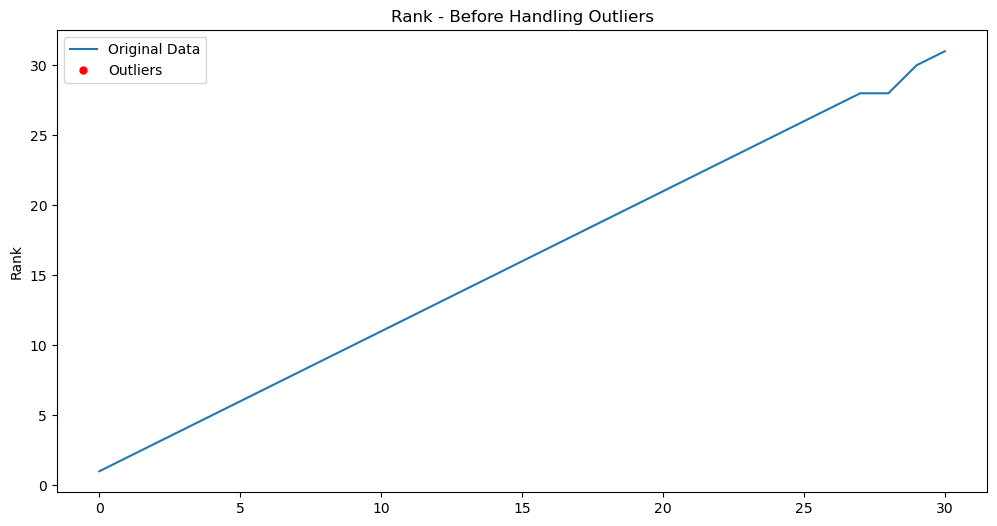

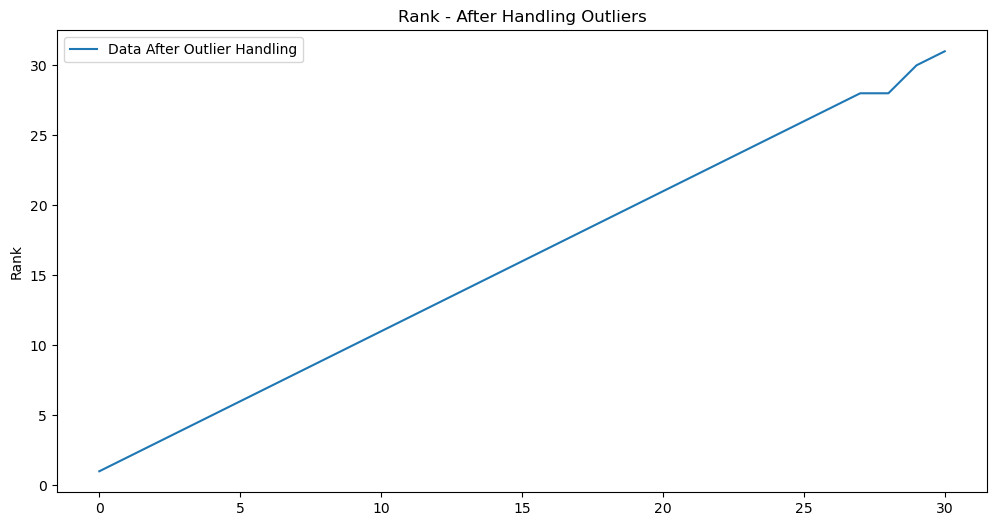

Revenue(billions US$)
lower_bound: -21.1
upper_bound: 54.9


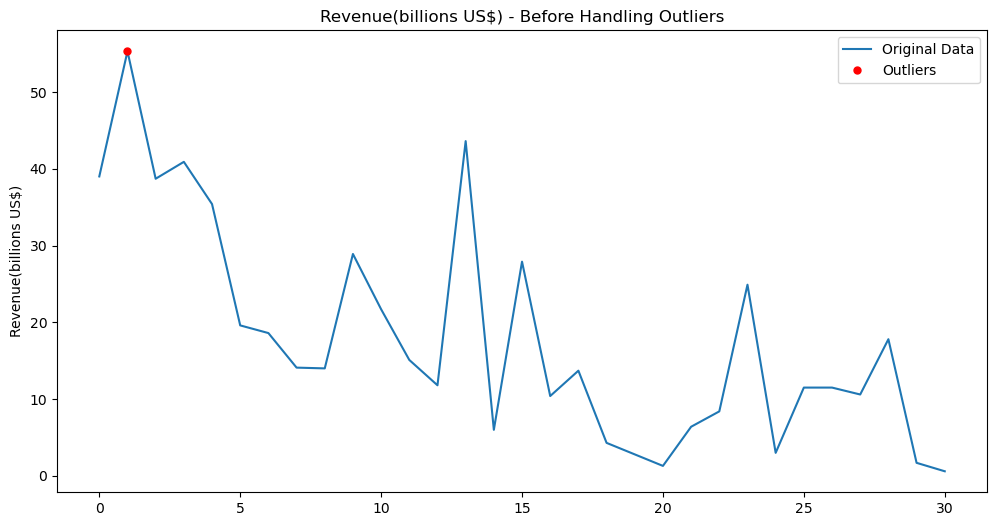

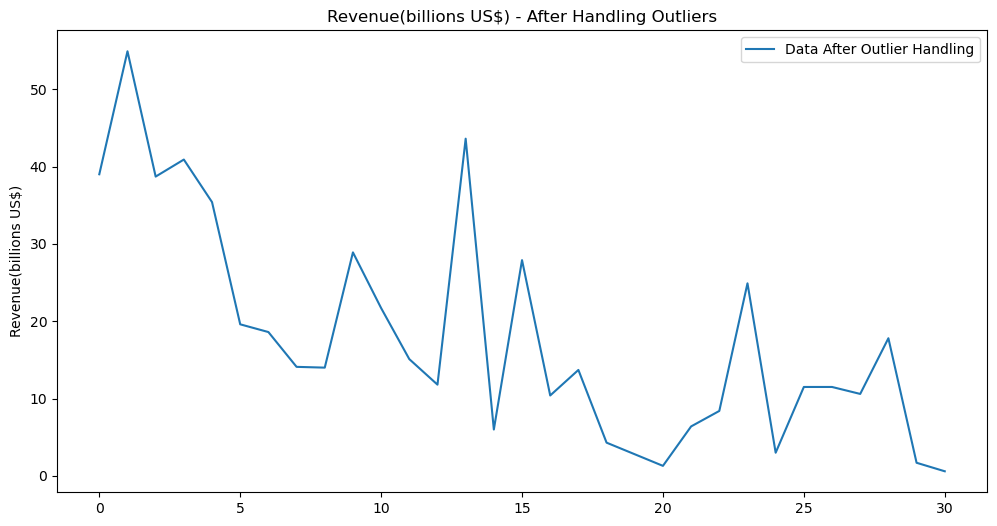

Profits(billions US$)
lower_bound: -2.4
upper_bound: 5.2


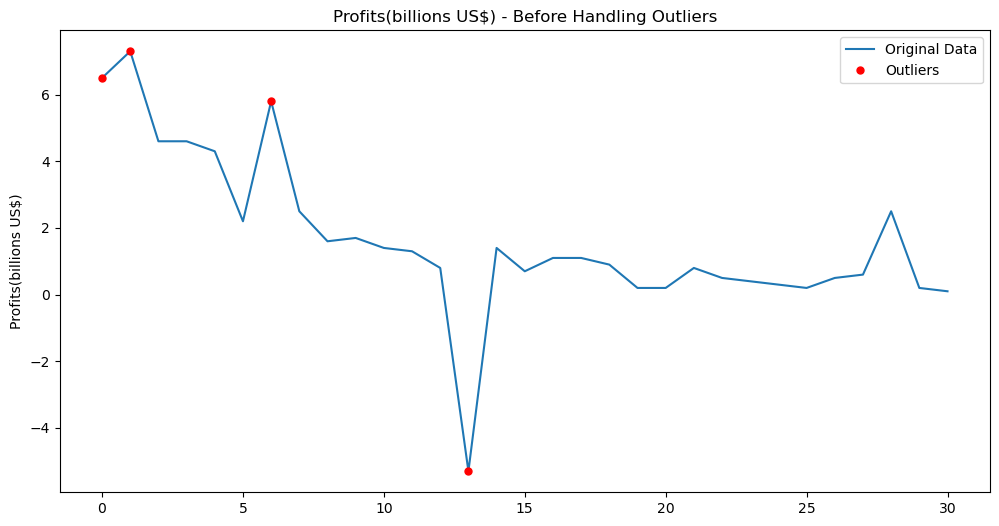

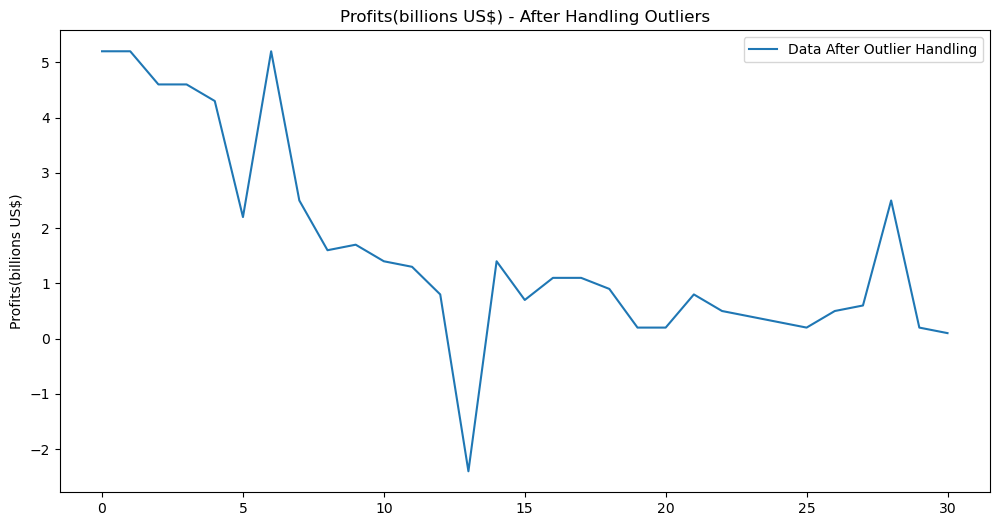

Assets(billions US$)
lower_bound: -67.22500000000001
upper_bound: 147.375


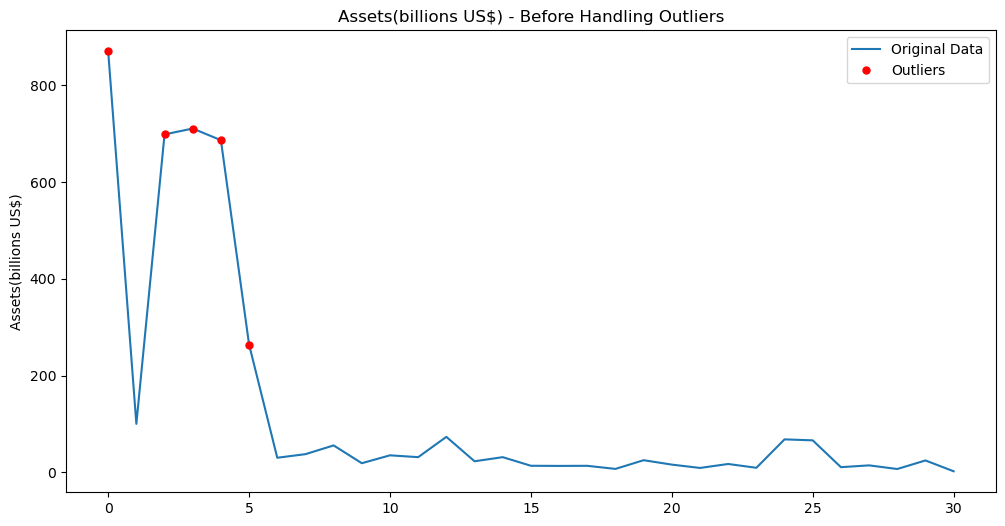

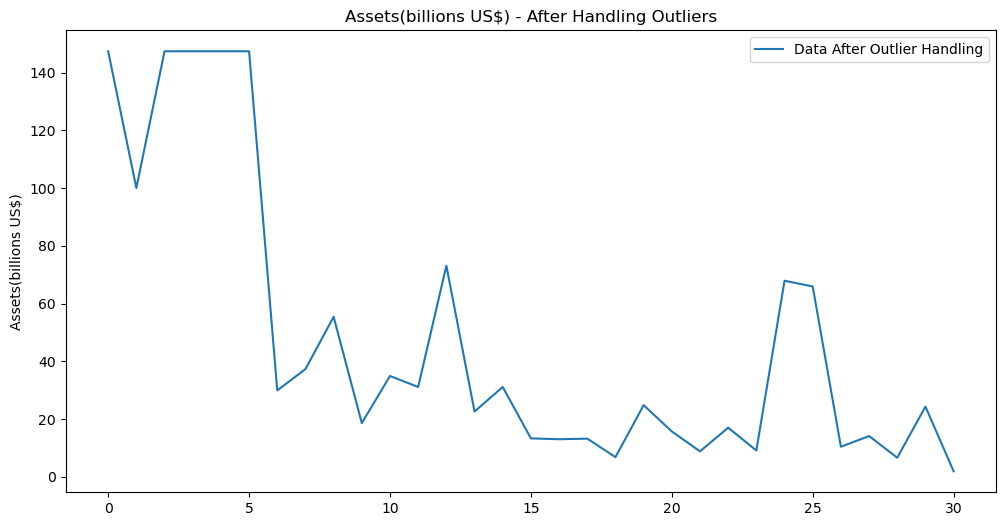

Value
lower_bound: -45.525
upper_bound: 99.475


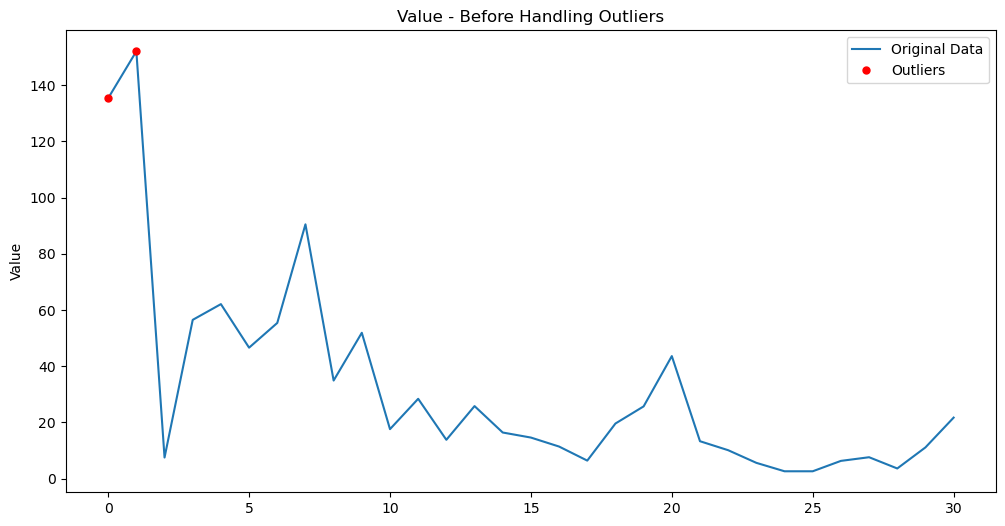

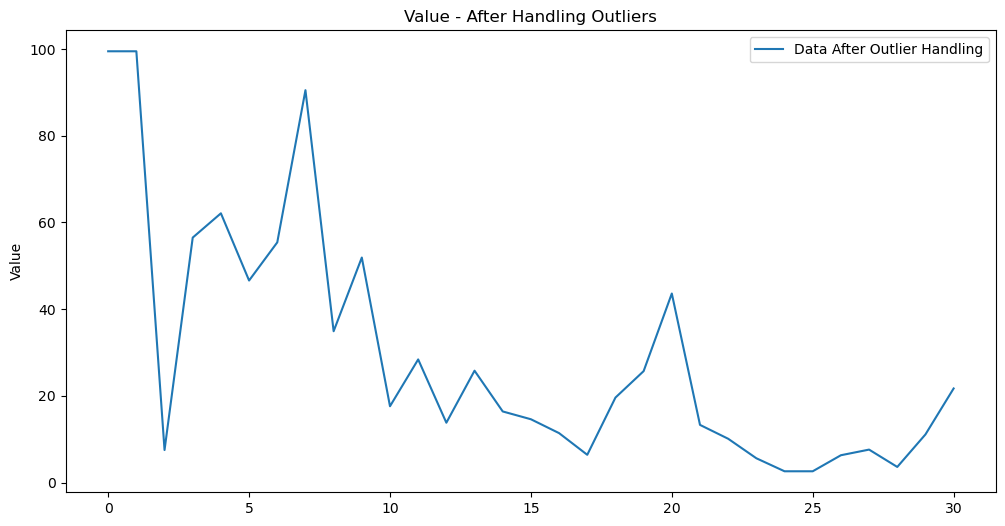

In [520]:
#Define Outliers and handle Outliers
columns_values = ['Rank', 'Revenue(billions US$)', 'Profits(billions US$)', 'Assets(billions US$)', 'Value']
for i, feature in enumerate(columns_values, 1):
    print(feature)
    # Calculate IQR to identify anomalies
    Q1 = df1[feature].quantile(0.25)
    Q3 = df1[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"lower_bound: {lower_bound}")
    print(f"upper_bound: {upper_bound}")
    # Identify anomalies (outliers)
    df1['Anomaly_IQR'] = (df1[feature] < lower_bound) | (df1[feature] > upper_bound)
    
    # Plot data before handling outliers
    plt.figure(figsize=(12, 6))
    plt.plot(df1.index, df1[feature], label='Original Data')
    plt.plot(df1[df1['Anomaly_IQR']].index, df1[df1['Anomaly_IQR']][feature], 'ro', markersize=5, label='Outliers')
    plt.ylabel(feature)  # Set y-axis label to feature name
    plt.title(f'{feature} - Before Handling Outliers')
    plt.legend()
    plt.show()
    
    # HANDLING OUTLIERS
    df1[feature] = df1[feature].clip(lower=lower_bound, upper=upper_bound)
    
    # Plot data after handling outliers
    plt.figure(figsize=(12, 6))
    plt.plot(df1.index, df1[feature], label='Data After Outlier Handling')
    plt.ylabel(feature)  # Set y-axis label to feature name
    plt.title(f'{feature} - After Handling Outliers')
    plt.legend()
    plt.show()

In [522]:
#Remove the extra column 'Anomaly_IQR' that was added earlier for visualizing outliers, after handling the outliers.
# Drop the 'Anomaly_IQR' column from the dataframe
df1 = df1.drop(columns=['Anomaly_IQR'])

In [524]:
df1.describe()

,Rank,Revenue(billions US$),Profits(billions US$),Assets(billions US$),Value
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,15.967742,18.035484,1.609677,47.860484,29.424194
std,9.046118,14.317857,1.844335,49.688956,28.283159
min,1.000000,0.600000,-2.400000,1.900000,2.600000
25%,8.500000,7.400000,0.450000,13.250000,8.850000
50%,16.000000,14.000000,1.100000,24.800000,17.600000
75%,23.500000,26.400000,2.350000,66.900000,45.100000
max,31.000000,54.900000,5.200000,147.375000,99.475000


In [50]:
#Method5: encoding and decoding 
#from sklearn.preprocessing import LabelEncoder

#Initialize the label encoder
#label_encoder = LabelEncoder()

#Encode the 'Industry' column (convert categories to numbers)
#df1['Industry_Encoded'] = label_encoder.fit_transform(df1['Industry'])

# Display the DataFrame with encoded values
#print("Encoded DataFrame:")
#print(df1[['Industry', 'Industry_Encoded']])


Encoded DataFrame:
              Industry  Industry_Encoded
0              Banking                 1
1               Mining                 8
2              Banking                 1
3              Banking                 1
4              Banking                 1
5              Finance                 3
6       Iron and Steel                 7
7       Pharmaceutical                10
8          Oil and gas                 9
9         Conglomerate                 2
10           Insurance                 6
11  Telecommunications                15
12           Insurance                 6
13              Retail                12
14         Oil and gas                 9
15              Retail                12
16           Utilities                17
17             Airline                 0
18            Gambling                 4
19      Transportation                16
20         Real estate                11
21            Services                13
22           Insurance                

In [52]:
# Decode the 'Industry_Encoded' column back to original categories
#df1['Industry_Decoded'] = label_encoder.inverse_transform(df1['Industry_Encoded'])

#Display the DataFrame with decoded values
#print("\nDecoded DataFrame:")
#print(df1[['Industry_Encoded', 'Industry_Decoded']])



Decoded DataFrame:
    Industry_Encoded    Industry_Decoded
0                  1             Banking
1                  8              Mining
2                  1             Banking
3                  1             Banking
4                  1             Banking
5                  3             Finance
6                  7      Iron and Steel
7                 10      Pharmaceutical
8                  9         Oil and gas
9                  2        Conglomerate
10                 6           Insurance
11                15  Telecommunications
12                 6           Insurance
13                12              Retail
14                 9         Oil and gas
15                12              Retail
16                17           Utilities
17                 0             Airline
18                 4            Gambling
19                16      Transportation
20                11         Real estate
21                13            Services
22                 6           Insura

In [476]:
#Method 5: Converting units
# Looking at the statistical summary of the Forecast column, 
# there is a wide range of values, Maximum: 724,602.5 vzs minimum: 66.0
#The range of values is vast, indicating that large countries with high GDP forecasts will dominate any analysis if the data is not standardized. 
#This imbalance can lead to biased results in statistical or machine learning models.
#Leading to reason for implementing standardizing forecast colum.
#from sklearn.preprocessing import StandardScaler

# Create a scaler object
#scaler = StandardScaler()

# Standardize the selected columns in df1
#df1[['Rank', 'Revenue(billions US$)', 'Profits(billions US$)', 'Assets(billions US$)', 'Value']] = scaler.fit_transform(df1[['Rank', 'Revenue(billions US$)', 'Profits(billions US$)', 'Assets(billions US$)', 'Value']])

# Optionally, create standardized columns with '_Standardized' suffix
#df1[['Rank_Standardized', 'Revenue(billions US$)_Standardized', 'Profits(billions US$)_Standardized', 'Assets(billions US$)_Standardized', 'Value_Standardized']] = scaler.fit_transform(df1[['Rank', 'Revenue(billions US$)', 'Profits(billions US$)', 'Assets(billions US$)', 'Value']])

# Verify the results
#print(df1.head())


# View the standardized column
#print(df1[['Rank', 'Revenue(billions US$)', 'Profits(billions US$)', 'Assets(billions US$)', 'Value', 
          # 'Rank_Standardized', 'Revenue(billions US$)_Standardized', 'Profits(billions US$)_Standardized', 
           #'Assets(billions US$)_Standardized', 'Value_Standardized']])


In [ ]:
#PART C

In [530]:
#Task 5: Store Datasets Save cleaned dataset as csv file
df1.to_csv("C:\\Users\\Aynur\\Desktop\\GDDA612\\Largest_companies_of_Australia1_cleaned.csv",index=False)